# Part 3

My set-up code. I also import the data.

Note how I mix Markdown and code comments below.

In [79]:

# Set-up, data import, and check

import numpy as np
import pandas as pd
import datetime as dt

import matplotlib as mpl

# This lets us refer to the pyplot part of matplot lib more easily. Just use plt!
import matplotlib.pyplot as plt

# importing the style package
from matplotlib import style
from matplotlib.ticker import StrMethodFormatter


# Keeps warnings from cluttering up our notebook. 
#import warnings
#warnings.filterwarnings('ignore')

dsf = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/crsp_022722.csv')

dsf.info()
dsf.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PERMNO   2271 non-null   int64  
 1   date     2271 non-null   int64  
 2   TICKER   2271 non-null   object 
 3   CUSIP    2271 non-null   object 
 4   DISTCD   61 non-null     float64
 5   DIVAMT   61 non-null     float64
 6   FACPR    61 non-null     float64
 7   FACSHR   61 non-null     float64
 8   PRC      2271 non-null   float64
 9   VOL      2271 non-null   int64  
 10  RET      2271 non-null   float64
 11  SHROUT   2271 non-null   int64  
 12  CFACPR   2271 non-null   int64  
 13  CFACSHR  2271 non-null   int64  
 14  sprtrn   2271 non-null   float64
dtypes: float64(7), int64(6), object(2)
memory usage: 266.3+ KB


,PERMNO,date,TICKER,CUSIP,DISTCD,DIVAMT,FACPR,FACSHR,PRC,VOL,RET,SHROUT,CFACPR,CFACSHR,sprtrn
0,11850,20190102,XOM,30231G10,NaN,NaN,NaN,NaN,69.69,16727246,0.021997,4233807,1,1,0.001269
1,11850,20190103,XOM,30231G10,NaN,NaN,NaN,NaN,68.62,13866115,-0.015354,4233807,1,1,-0.024757
2,11850,20190104,XOM,30231G10,NaN,NaN,NaN,NaN,71.15,16043642,0.036870,4233807,1,1,0.034336
3,11850,20190107,XOM,30231G10,NaN,NaN,NaN,NaN,71.52,10844159,0.005200,4233807,1,1,0.007010
4,11850,20190108,XOM,30231G10,NaN,NaN,NaN,NaN,72.04,11438966,0.007271,4233807,1,1,0.009695


In [80]:
dsf = dsf[(dsf['PRC'].notna()) & (dsf['RET'].notna())]

dsf['date']=pd.to_datetime(dsf['date'], format='%Y%m%d')

dsf.info()

dsf.head()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2271 entries, 0 to 2270
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   PERMNO   2271 non-null   int64         
 1   date     2271 non-null   datetime64[ns]
 2   TICKER   2271 non-null   object        
 3   CUSIP    2271 non-null   object        
 4   DISTCD   61 non-null     float64       
 5   DIVAMT   61 non-null     float64       
 6   FACPR    61 non-null     float64       
 7   FACSHR   61 non-null     float64       
 8   PRC      2271 non-null   float64       
 9   VOL      2271 non-null   int64         
 10  RET      2271 non-null   float64       
 11  SHROUT   2271 non-null   int64         
 12  CFACPR   2271 non-null   int64         
 13  CFACSHR  2271 non-null   int64         
 14  sprtrn   2271 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(5), object(2)
memory usage: 283.9+ KB


,PERMNO,date,TICKER,CUSIP,DISTCD,DIVAMT,FACPR,FACSHR,PRC,VOL,RET,SHROUT,CFACPR,CFACSHR,sprtrn
0,11850,2019-01-02,XOM,30231G10,NaN,NaN,NaN,NaN,69.69,16727246,0.021997,4233807,1,1,0.001269
1,11850,2019-01-03,XOM,30231G10,NaN,NaN,NaN,NaN,68.62,13866115,-0.015354,4233807,1,1,-0.024757
2,11850,2019-01-04,XOM,30231G10,NaN,NaN,NaN,NaN,71.15,16043642,0.036870,4233807,1,1,0.034336
3,11850,2019-01-07,XOM,30231G10,NaN,NaN,NaN,NaN,71.52,10844159,0.005200,4233807,1,1,0.007010
4,11850,2019-01-08,XOM,30231G10,NaN,NaN,NaN,NaN,72.04,11438966,0.007271,4233807,1,1,0.009695


I'm checking my variables above - in particular, I want to see if date is really a `datetime`. Check out the `format=` part of the statement. This is telling `to_datetime()` how to bring in the date.

In [81]:
dsf.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2269, 2270],
           dtype='int64', length=2271)

I haven't set an index... yet.

In [82]:
## Part 4

dsf['PRC_ADJ'] = dsf['PRC'] / dsf['CFACPR']


You can do math using functions like `.div()`. They do that a lot in the Datacamps. I like just doing the math out.

In [83]:
dsf.set_index(['PERMNO', 'date'])

TICKER     CUSIP  DISTCD  DIVAMT  FACPR  FACSHR        PRC  \
PERMNO date                                                                    
11850  2019-01-02    XOM  30231G10     NaN     NaN    NaN     NaN   69.69000   
       2019-01-03    XOM  30231G10     NaN     NaN    NaN     NaN   68.62000   
       2019-01-04    XOM  30231G10     NaN     NaN    NaN     NaN   71.15000   
       2019-01-07    XOM  30231G10     NaN     NaN    NaN     NaN   71.52000   
       2019-01-08    XOM  30231G10     NaN     NaN    NaN     NaN   72.04000   
...                  ...       ...     ...     ...    ...     ...        ...   
89468  2021-12-27    TLT  46428743     NaN     NaN    NaN     NaN  148.88000   
       2021-12-28    TLT  46428743     NaN     NaN    NaN     NaN  148.28999   
       2021-12-29    TLT  46428743     NaN     NaN    NaN     NaN  146.67000   
       2021-12-30    TLT  46428743     NaN     NaN    NaN     NaN  147.89999   
       2021-12-31    TLT  46428743     NaN     NaN    NaN     NaN  148.19000   

                        VOL       RET   SHROUT  CFACPR  CFACSHR    sprtrn  \
PERMNO date                                                                 
11850  2019-01-02  16727246  0.021997  4233807       1        1  0.001269   
       2019-01-03  13866115 -0.015354  4233807       1        1 -0.024757   
       2019-01-04  16043642  0.036870  4233807       1        1  0.034336   
       2019-01-07  10844159  0.005200  4233807       1        1  0.007010   
       2019-01-08  11438966  0.007271  4233807       1        1  0.009695   
...                     ...       ...      ...     ...      ...       ...   
89468  2021-12-27   7854290  0.002424   132000       1        1  0.013839   
       2021-12-28   9173504 -0.003963   133200       1        1 -0.001010   
       2021-12-29  11763496 -0.010925   133400       1        1  0.001402   
       2021-12-30  10340148  0.008386   133400       1        1 -0.002990   
       2021-12-31  13389734  0.001961   132800       1        1 -0.002626   

                     PRC_ADJ  
PERMNO date                   
11850  2019-01-02   69.69000  
       2019-01-03   68.62000  
       2019-01-04   71.15000  
       2019-01-07   71.52000  
       2019-01-08   72.04000  
...                      ...  
89468  2021-12-27  148.88000  
       2021-12-28  148.28999  
       2021-12-29  146.67000  
       2021-12-30  147.89999  
       2021-12-31  148.19000  

[2271 rows x 14 columns]

See the two indices above?

In [84]:
dsf['PRC_ADJ_LAG1'] = dsf.groupby(['PERMNO'])['PRC_ADJ'].shift(1)
dsf['DIVAMT']=dsf['DIVAMT'].fillna(0)


Pay **very close attention** to how these `groupby()` statements work, when you use `()` and when you use`[]`. You use `[]` when picking out a column.

In [85]:
dsf['RETURN'] = (dsf['PRC_ADJ'] + dsf['DIVAMT']) / dsf['PRC_ADJ_LAG1'] - 1

dsf['RET_DIFF'] = dsf['RETURN'] - dsf['RET']

dsf['RET_DIFF'].describe()

count    2.268000e+03
mean     2.877561e-05
std      5.352483e-04
min     -5.893364e-07
25%     -2.504981e-07
50%      4.375622e-09
75%      2.611786e-07
max      1.281151e-02
Name: RET_DIFF, dtype: float64

These are basically zeroes. Remember our discussion of floats and math?

# Part 5

In [86]:


dsf['RET_G'] = dsf['RET'] + 1
dsf['RET_C'] = dsf.groupby(['PERMNO'])['RET_G'].cumprod().sub(1)


Another `groupby()` above.

# Part 6

In [87]:
dsf.set_index('date', inplace=True)

This code sets the index as **date** and uses and `inplace=True` to save the **dsf** DataFrame to memory.

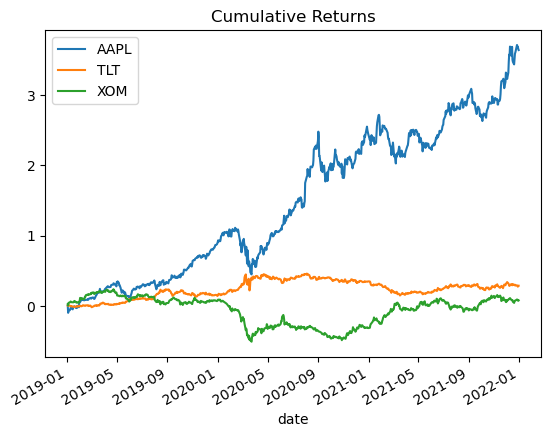

In [88]:
dsf.groupby('TICKER')['RET_C'].plot(legend=True, title = 'Cumulative Returns');

In [89]:
dsf.reset_index(inplace=True)

dsf

,date,PERMNO,TICKER,CUSIP,DISTCD,DIVAMT,FACPR,FACSHR,PRC,VOL,...,SHROUT,CFACPR,CFACSHR,sprtrn,PRC_ADJ,PRC_ADJ_LAG1,RETURN,RET_DIFF,RET_G,RET_C
0,2019-01-02,11850,XOM,30231G10,NaN,0.0,NaN,NaN,69.69000,16727246,...,4233807,1,1,0.001269,69.69000,NaN,NaN,NaN,1.021997,0.021997
1,2019-01-03,11850,XOM,30231G10,NaN,0.0,NaN,NaN,68.62000,13866115,...,4233807,1,1,-0.024757,68.62000,69.69000,-0.015354,2.907160e-07,0.984646,0.006305
2,2019-01-04,11850,XOM,30231G10,NaN,0.0,NaN,NaN,71.15000,16043642,...,4233807,1,1,0.034336,71.15000,68.62000,0.036870,-2.827164e-07,1.036870,0.043408
3,2019-01-07,11850,XOM,30231G10,NaN,0.0,NaN,NaN,71.52000,10844159,...,4233807,1,1,0.007010,71.52000,71.15000,0.005200,2.810963e-07,1.005200,0.048833
4,2019-01-08,11850,XOM,30231G10,NaN,0.0,NaN,NaN,72.04000,11438966,...,4233807,1,1,0.009695,72.04000,71.52000,0.007271,-3.064877e-07,1.007271,0.056460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,2021-12-27,89468,TLT,46428743,NaN,0.0,NaN,NaN,148.88000,7854290,...,132000,1,1,0.013839,148.88000,148.52000,0.002424,-8.402909e-08,1.002424,0.292280
2267,2021-12-28,89468,TLT,46428743,NaN,0.0,NaN,NaN,148.28999,9173504,...,133200,1,1,-0.001010,148.28999,148.88000,-0.003963,9.672219e-09,0.996037,0.287159
2268,2021-12-29,89468,TLT,46428743,NaN,0.0,NaN,NaN,146.67000,11763496,...,133400,1,1,0.001402,146.67000,148.28999,-0.010924,5.269455e-07,0.989075,0.273097
2269,2021-12-30,89468,TLT,46428743,NaN,0.0,NaN,NaN,147.89999,10340148,...,133400,1,1,-0.002990,147.89999,146.67000,0.008386,1.048613e-07,1.008386,0.283773


I sometimes just use the name of the DatFrame to peak at my data.

In [90]:
dsf_wide = dsf.pivot_table(index='date', columns='TICKER', values='RET_C')

Note that `pivot_table()` is different from `pivot`. They do similar things, though.

In [91]:
dsf_wide

TICKER,AAPL,TLT,XOM
date,,,
2019-01-02,0.001141,0.005267,0.021997
2019-01-03,-0.098580,0.016706,0.006305
2019-01-04,-0.060099,0.004938,0.043408
2019-01-07,-0.062191,0.001975,0.048833
2019-01-08,-0.044314,-0.000658,0.056460
...,...,...,...
2021-12-27,3.710741,0.292280,0.090813
2021-12-28,3.683574,0.287159,0.087288
2021-12-29,3.685925,0.273097,0.077771


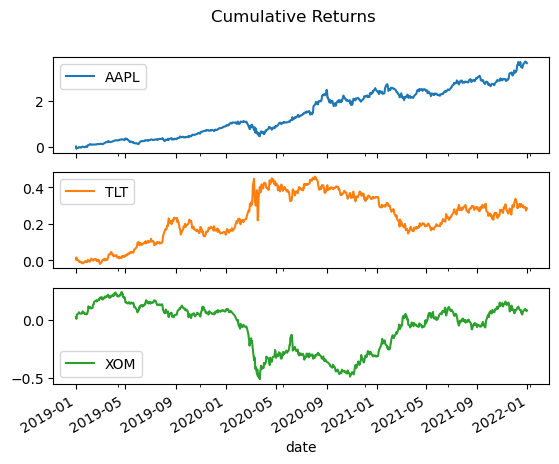

In [92]:
dsf_wide.plot(subplots = 'True', title = 'Cumulative Returns');


# Part 7

In [93]:
dsf_ret_wide = dsf.pivot_table(index = 'date', columns = 'TICKER', values = 'RET')
dsf_price_wide = dsf.pivot_table(index = 'date', columns = 'TICKER', values = 'PRC_ADJ')

In [94]:
dsf_price_wide

TICKER,AAPL,TLT,XOM
date,,,
2019-01-02,39.480000,122.15000,69.69
2019-01-03,35.547500,123.54000,68.62
2019-01-04,37.064997,122.11000,71.15
2019-01-07,36.982498,121.75000,71.52
2019-01-08,37.687500,121.43000,72.04
...,...,...,...
2021-12-27,180.330000,148.88000,61.89
2021-12-28,179.289990,148.28999,61.69
2021-12-29,179.380000,146.67000,61.15


# Part 8

I am using one column in the DataFrame to create a new column. You can find more examples of `.rolling()` in the Datacamps.

See how I add two lines to each subplot? I use `.plot()` from `pandas` to add two lines to each subplot, or graph. `axs[0]` is one subplot, while `axs[1]` is the other.

Each has their own title. I add the legend to the top subplot. Try changing that to `axs[1]` to see what happens -- it won't work because I only added labels to the lines in the AAPL plot. 'k' and 'b' are colors.

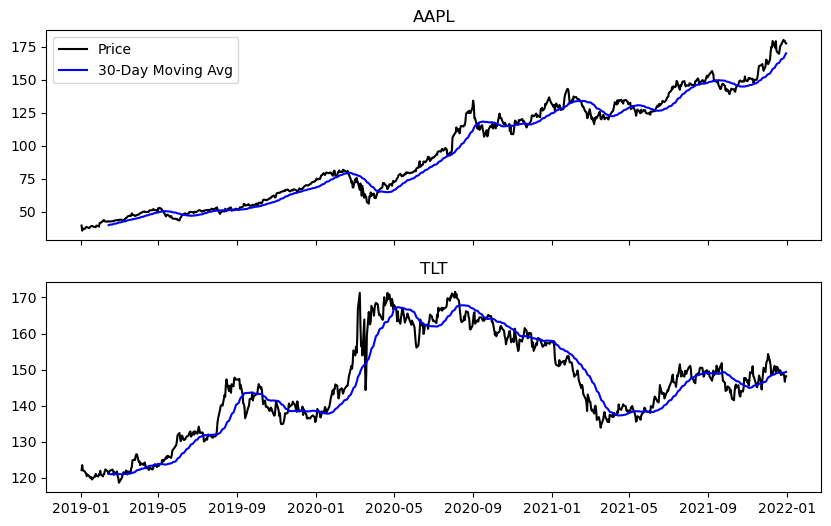

In [95]:
dsf_price_wide['aapl_sma_30'] = dsf_price_wide['AAPL'].rolling(window=30).mean()
dsf_price_wide['tlt_sma_30'] = dsf_price_wide['TLT'].rolling(window=30).mean()

fig, axs = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(10, 6))

axs[0].plot(dsf_price_wide.AAPL, 'k', label = 'Price')
axs[0].plot(dsf_price_wide.aapl_sma_30, 'b', label = '30-Day Moving Avg')

axs[1].plot(dsf_price_wide.TLT, 'k')
axs[1].plot(dsf_price_wide.tlt_sma_30, 'b')

axs[0].set_title('AAPL')
axs[1].set_title('TLT')

axs[0].legend()

